# CAPSTONE UAS Bengkel Koding DS-06

- Nama: Muhammad Rendy Ramadhan
- Nim: A11.2022.14590
- Kelas: DS-06

In [ ]:
#import library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#membaca dataset
df = pd.read_csv('ObesityDataSet.csv')

In [ ]:
#menampilkan data
df.head()

,Age,Gender,Height,Weight,CALC,FAVC,FCVC,NCP,SCC,SMOKE,CH2O,family_history_with_overweight,FAF,TUE,CAEC,MTRANS,NObeyesdad
0,21,Female,1.62,64,no,no,2,3,no,no,2,yes,0,1,Sometimes,Public_Transportation,Normal_Weight
1,21,Female,1.52,56,Sometimes,no,3,3,yes,yes,3,yes,3,0,Sometimes,Public_Transportation,Normal_Weight
2,23,Male,1.8,77,Frequently,no,2,3,no,no,2,yes,2,1,Sometimes,Public_Transportation,Normal_Weight
3,27,Male,1.8,87,Frequently,no,3,3,no,no,2,no,2,0,Sometimes,Walking,Overweight_Level_I
4,22,Male,1.78,89.8,Sometimes,no,2,1,no,no,2,no,0,0,Sometimes,Public_Transportation,Overweight_Level_II


In [ ]:
#menampilkan info data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   Age                             2097 non-null   object
 1   Gender                          2102 non-null   object
 2   Height                          2099 non-null   object
 3   Weight                          2100 non-null   object
 4   CALC                            2106 non-null   object
 5   FAVC                            2100 non-null   object
 6   FCVC                            2103 non-null   object
 7   NCP                             2099 non-null   object
 8   SCC                             2101 non-null   object
 9   SMOKE                           2106 non-null   object
 10  CH2O                            2105 non-null   object
 11  family_history_with_overweight  2098 non-null   object
 12  FAF                             2103 non-null   

In [ ]:
# 2. Cek dan ubah tipe data numerik jika perlu
numeric_cols = ['Age', 'Height', 'Weight', 'NCP', 'CH2O', 'FAF', 'TUE']
for col in numeric_cols:
    df[col] = pd.to_numeric(df[col], errors='coerce')

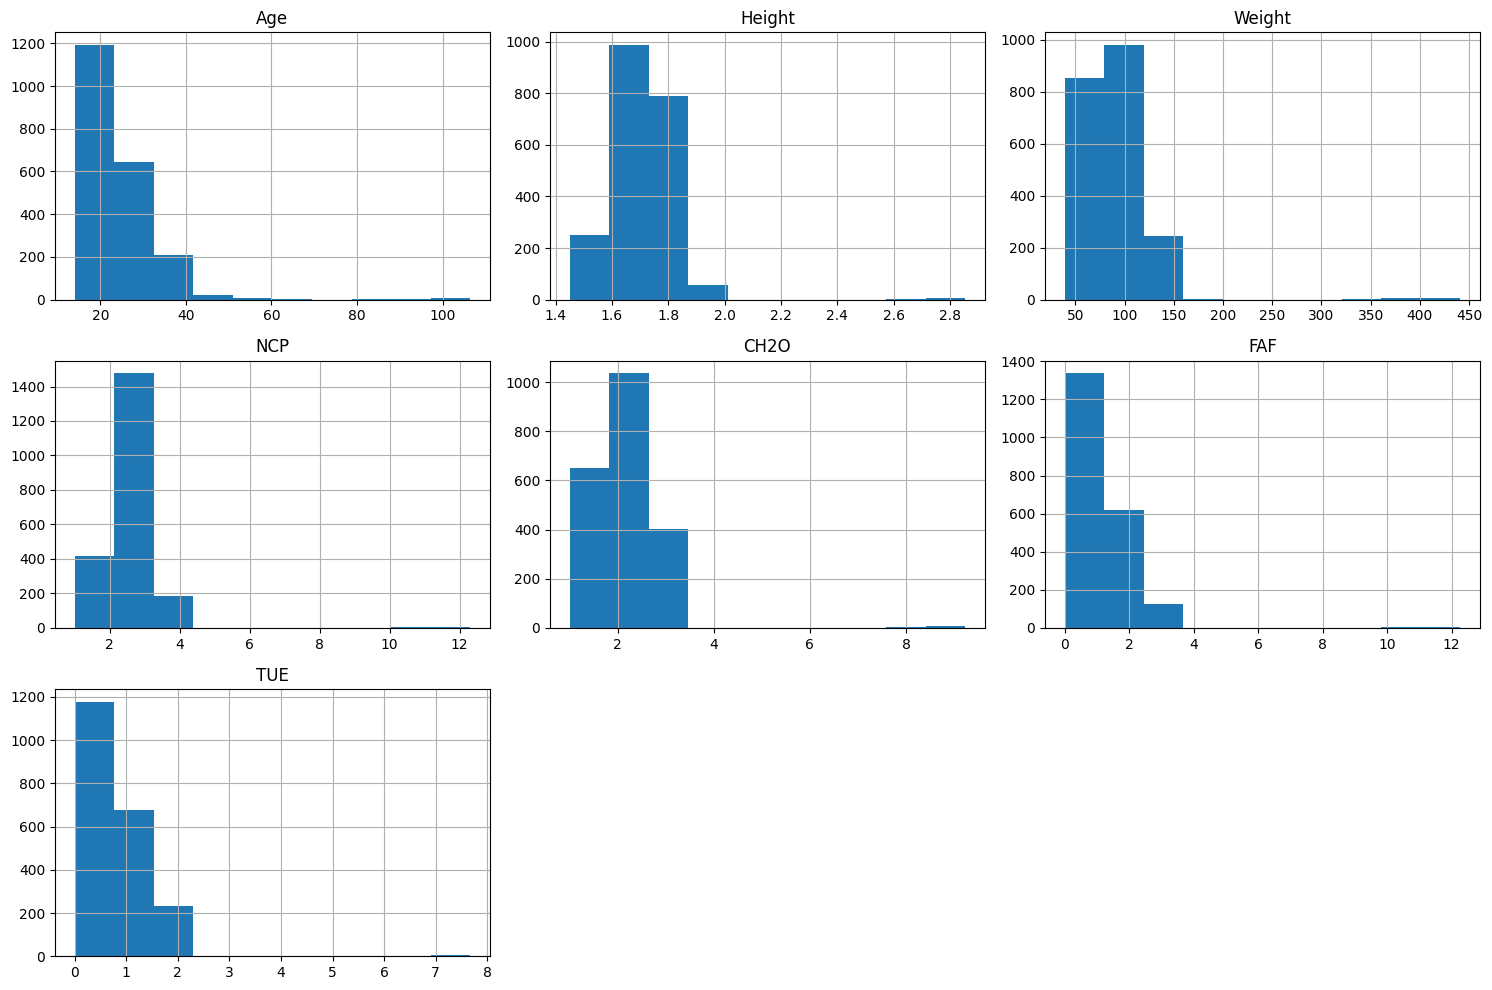

In [ ]:
# 3. Visualisasi data numerik dengan histogram
numeric_features = df.select_dtypes(include=[np.number]).columns
df[numeric_features].hist(figsize=(15, 10))
plt.tight_layout()
plt.show()

In [ ]:
# Cek missing values
print("Missing values sebelum pembersihan:")
print(df.isnull().sum())

Missing values sebelum pembersihan:
Age                               22
Gender                             9
Height                            22
Weight                            19
CALC                               5
FAVC                              11
FCVC                               8
NCP                               22
SCC                               10
SMOKE                              5
CH2O                              15
family_history_with_overweight    13
FAF                               19
TUE                               15
CAEC                              11
MTRANS                             6
NObeyesdad                         0
dtype: int64


In [ ]:
# Tampilkan tipe data setiap kolom
print(df.dtypes)

# Memeriksa nilai non-numerik
numeric_columns = df.select_dtypes(include=[np.number]).columns
for col in numeric_columns:
    non_numeric = df[pd.to_numeric(df[col], errors='coerce').isna()]
    if len(non_numeric) > 0:
        print(f"\nNilai non-numerik dalam kolom {col}:")
        print(non_numeric[col].unique())

Age                               float64
Gender                             object
Height                            float64
Weight                            float64
CALC                               object
FAVC                               object
FCVC                               object
NCP                               float64
SCC                                object
SMOKE                              object
CH2O                              float64
family_history_with_overweight     object
FAF                               float64
TUE                               float64
CAEC                               object
MTRANS                             object
NObeyesdad                         object
dtype: object

Nilai non-numerik dalam kolom Age:
[nan]

Nilai non-numerik dalam kolom Height:
[nan]

Nilai non-numerik dalam kolom Weight:
[nan]

Nilai non-numerik dalam kolom NCP:
[nan]

Nilai non-numerik dalam kolom CH2O:
[nan]

Nilai non-numerik dalam kolom FAF:
[nan]

Nilai non-nu

In [ ]:
# Periksa range nilai untuk kolom numerik
for col in numeric_columns:
    print(f"\nRange nilai untuk {col}:")
    print(f"Min: {df[col].min()}, Max: {df[col].max()}")

# Periksa kategori unik untuk kolom kategorikal
categorical_columns = df.select_dtypes(include=['object']).columns
for col in categorical_columns:
    print(f"\nKategori unik dalam {col}:")
    print(df[col].unique())


Range nilai untuk Age:
Min: 14.0, Max: 106.4412521246347

Range nilai untuk Height:
Min: 1.45, Max: 2.853986075232335

Range nilai untuk Weight:
Min: 39.0, Max: 441.1310776586406

Range nilai untuk NCP:
Min: 1.0, Max: 12.299828447218044

Range nilai untuk CH2O:
Min: 1.0, Max: 9.23329438001147

Range nilai untuk FAF:
Min: 0.0, Max: 12.270274762078117

Range nilai untuk TUE:
Min: 0.0, Max: 7.669504206178693

Kategori unik dalam Gender:
['Female' 'Male' '?' nan]

Kategori unik dalam CALC:
['no' 'Sometimes' 'Frequently' '?' 'Always' nan]

Kategori unik dalam FAVC:
['no' 'yes' '?' nan]

Kategori unik dalam FCVC:
['2' '3' '1' nan '?' '8.148992744163786' '8.42397392777979' '2.450218'
 '2.880161' '2.00876' '2.596579' '2.591439' '2.392665' '1.123939'
 '2.027574' '2.658112' '2.88626' '2.714447' '2.750715' '1.4925' '2.205439'
 '2.059138' '2.310423' '2.823179' '2.052932' '2.596364' '2.767731'
 '2.815157' '2.737762' '2.524428' '2.971574' '1.0816' '1.270448'
 '1.344854' '2.959658' '2.725282' '2.844

In [ ]:
# Cek duplikat
duplicate_count = df.duplicated().sum()
print(f"Jumlah baris duplikat: {duplicate_count}")

Jumlah baris duplikat: 18


In [ ]:
# Distribusi target variable
df['NObeyesdad'].value_counts(normalize=True)

,proportion
NObeyesdad,
Obesity_Type_I,0.166272
Obesity_Type_III,0.153482
Obesity_Type_II,0.140692
Overweight_Level_I,0.137376
Overweight_Level_II,0.137376
Normal_Weight,0.135955
Insufficient_Weight,0.128849


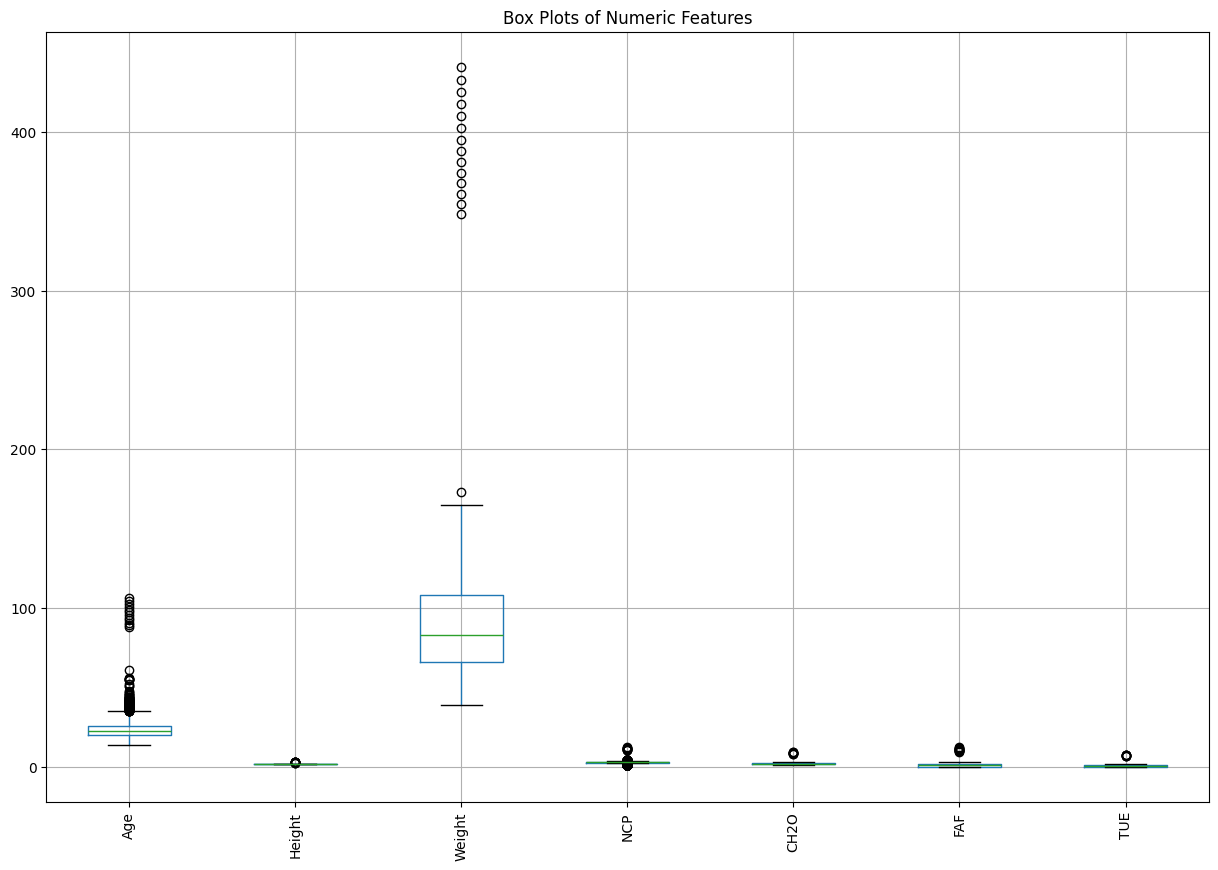

In [ ]:
# Box plot untuk mendeteksi outlier pada variabel numerik
plt.figure(figsize=(15, 10))
df[numeric_features].boxplot()
plt.title('Box Plots of Numeric Features')
plt.xticks(rotation=90)
plt.show()

Kesimpulan:
.....